In [1]:
#//*** Load Libraries.
#//*** Install Pacman installer if not loaded
if (!require("pacman")) install.packages("pacman")

#//*** Load libraries with pacman.
#//*** Automatically installs libraries as needed.
p_load(ggplot2, ggthemes, dplyr, readr, scales, forcats, readxl, showtext, ggrepel)

Loading required package: pacman
Warning message:
"package 'pacman' was built under R version 3.6.3"

In [2]:
font_add("Tahoma","Tahoma.ttf")
font_add("XKCD","./fonts/xkcd-Regular.otf")
font_add("Roboto Condensed", "./fonts/RobotoCondensed-Regular.ttf")
#font_add("Decima Mono Pro","DecimaMonoPro.otf")
showtext_auto()

In [3]:



raw_df <- read_excel("z_wk01_allhlcn20.xlsx")

#//*** Cleanup Column Names
#//*** Remove Spaces
names(raw_df) <- gsub(" ", ".", names(raw_df))
#//*** Remove NewLines
names(raw_df) <- gsub("\r\n", ".", names(raw_df))
raw_df

Area.Code,St,Cnty,Own,NAICS,Year,Qtr,Area.Type,St.Name,Area,Ownership,Industry,Annual.Average.Status.Code,Annual.Average.Establishment.Count,Annual.Average.Employment,Annual.Total.Wages,Annual.Average.Weekly.Wage,Annual.Average.Pay,Employment.Location.Quotient.Relative.to.U.S.,Total.Wage.Location.Quotient.Relative.to.U.S.
US000,US,000,0,10,2020,A,Nation,NA,U.S. TOTAL,Total Covered,"10 Total, all industries",NA,10494952,139106969,8.904711e+12,1231,64013,1.00,1.00
US000,US,000,1,10,2020,A,Nation,NA,U.S. TOTAL,Federal Government,"10 Total, all industries",NA,61310,2927788,2.502614e+11,1644,85478,1.00,1.00
US000,US,000,2,10,2020,A,Nation,NA,U.S. TOTAL,State Government,"10 Total, all industries",NA,70057,4590784,3.018914e+11,1265,65760,1.00,1.00
US000,US,000,3,10,2020,A,Nation,NA,U.S. TOTAL,Local Government,"10 Total, all industries",NA,171046,13643540,7.760565e+11,1094,56881,1.00,1.00
US000,US,000,5,10,2020,A,Nation,NA,U.S. TOTAL,Private,"10 Total, all industries",NA,10192539,117944857,7.576501e+12,1235,64238,1.00,1.00
US000,US,000,5,101,2020,A,Nation,NA,U.S. TOTAL,Private,101 Goods-producing,NA,1347213,21066170,1.480907e+12,1352,70298,1.00,1.00
US000,US,000,5,1011,2020,A,Nation,NA,U.S. TOTAL,Private,1011 Natural resources and mining,NA,140666,1781100,1.089623e+11,1176,61177,1.00,1.00
US000,US,000,5,1012,2020,A,Nation,NA,U.S. TOTAL,Private,1012 Construction,NA,847867,7201959,4.850675e+11,1295,67352,1.00,1.00
US000,US,000,5,1013,2020,A,Nation,NA,U.S. TOTAL,Private,1013 Manufacturing,NA,358681,12083111,8.868768e+11,1412,73398,1.00,1.00
US000,US,000,5,102,2020,A,Nation,NA,U.S. TOTAL,Private,102 Service-providing,NA,8845326,96878687,6.095595e+12,1210,62920,1.00,1.00


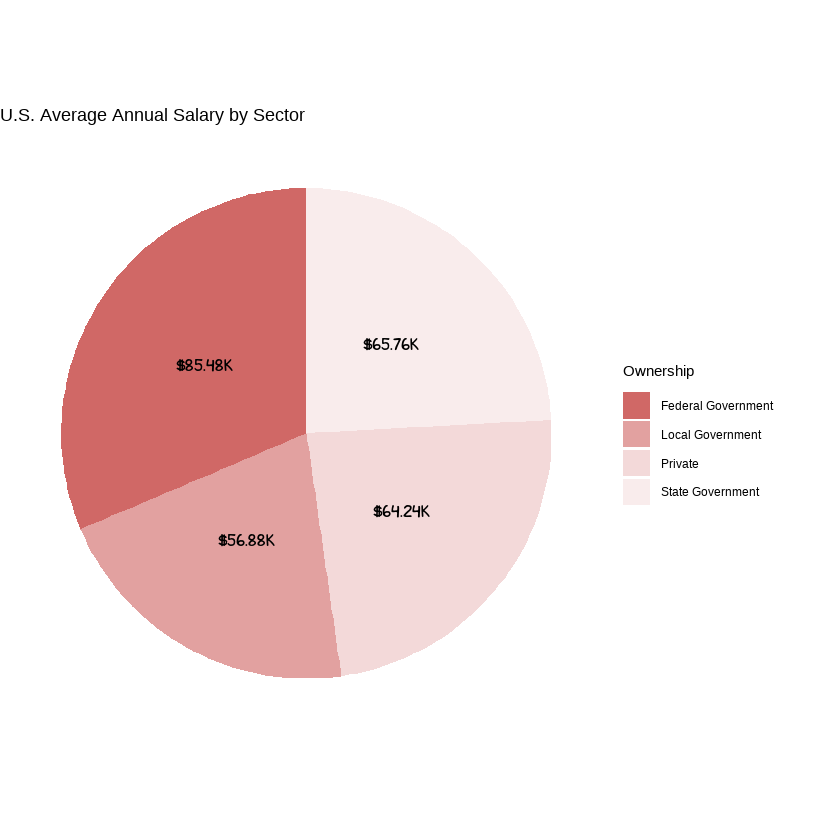

In [4]:
plot_df <- raw_df[raw_df["Ownership"] != "Total Covered" & 
       raw_df["Area.Type"] == "Nation" &
       raw_df["Industry"] == "10 Total, all industries"
       ,]


fill <- c("#b2d183","#40b8d0")
fill <- c("#c44240","#ca5553", "#d06866", "#d67b79", "#dc8e8c", "#e2a1a0", "#e7b3b3", "#edc6c6", "#f3d9d9", "#f9ecec", "#ffffff")
fill <- c("#d06866", "#e2a1a0", "#f3d9d9", "#f9ecec", "#ffffff")

ggplot(data=plot_df, aes(x="",y=Annual.Average.Pay, fill=Ownership))+
    geom_col() +
    geom_text(
        aes(label = paste0("$",round(Annual.Average.Pay/1000,2),"k")), 
        position = position_stack(vjust=0.5),
        family = "XKCD"
        ) +
    scale_fill_manual(values = fill) +
    labs(x = NULL, y = NULL,title="U.S. Average Annual Salary by Sector", family="XKCD") +
    theme_classic() +
    scale_y_discrete(labels=NULL)+
    

     
    theme(axis.line.x = element_line(size = .5, colour = "black"),
    axis.line.y = element_line(size = .5, colour = "black"),
    axis.text.x = element_text(colour = "black", size = 10),
    axis.text.y = element_text(colour = "black", size = 10),
    legend.key = element_rect(fill = "white", colour = "white"),
    legend.position = "bottom", legend.direction = "horizontal",
    legend.title = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.border = element_blank(),
    panel.background = element_blank(),
    plot.title = element_text(family = "XKCD"),
    text = element_text(family = "XKCD")) +
    theme_void()+
    coord_polar(theta = "y",start=0) 

#sum(plot_df["Annual Average Employment"])

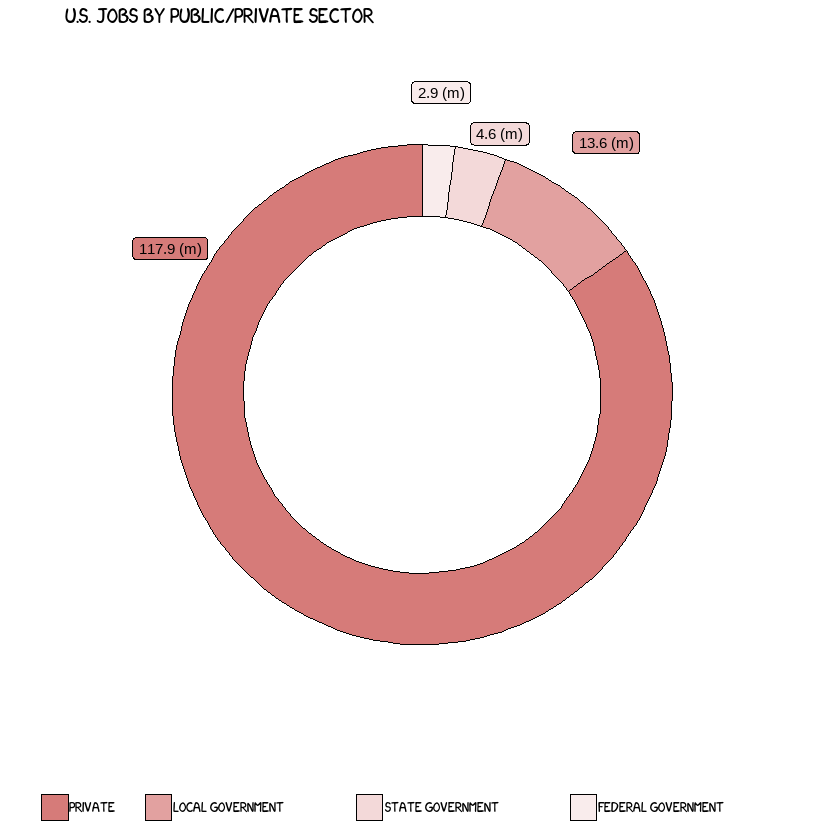

In [5]:
plot_df <- raw_df[raw_df["Ownership"] != "Total Covered" & 
       raw_df["Area.Type"] == "Nation" &
       raw_df["Industry"] == "10 Total, all industries"
       ,]
       
#//*** Color Palette
fill <- c("#b2d183","#40b8d0")
fill <- c("#c44240","#ca5553", "#d06866", "#d67b79", "#dc8e8c", "#e2a1a0", "#e7b3b3", "#edc6c6", "#f3d9d9", "#f9ecec", "#ffffff")
fill <- c("#d67b79", "#e2a1a0", "#f3d9d9", "#f9ecec", "#ffffff")

options(repr.plot.width = 7, repr.plot.height = 7)
ggplot(
    data=plot_df, 
    #//*** Donut Chart needs an x value
    aes(x=4,
    y=Annual.Average.Employment, fill=reorder(Ownership,-Annual.Average.Employment)))+
    geom_col(width=1,color=1)+
    geom_label_repel(
                   aes(
                       x=5, 
                       y=Annual.Average.Employment, 
                       label = paste(round(Annual.Average.Employment/1000000,1),"(m)")),
                    #position = position_dodge(width = .75),
                   show.legend = FALSE,
                   ) +
    scale_fill_manual(values = fill) +
    labs(x = NULL, y = NULL,title="U.S. Jobs by Public/Private Sector", family="XKCD") +
    #theme_classic() +
    scale_y_discrete(labels=NULL)+
    

    guides(fill = guide_legend(title = "Jobs (millions)"))+ 
    theme(axis.line.x = element_blank(),
        axis.line = element_blank(),
        #axis.line.y = element_line(size = .5, colour = "black"),
        #axis.text.x = element_text(colour = "black", size = 10),
        axis.text.y = element_blank(),
        legend.key = element_rect(fill = "white", colour = "white"),
        legend.position = "bottom", legend.direction = "horizontal",
        legend.title = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), panel.border = element_blank(),
        panel.background = element_blank(),
        plot.title = element_text(family = "XKCD"),
        axis.ticks = element_blank(),
        text = element_text(family = "XKCD")
    ) +
     
    #theme_void()+
    xlim(c(1, 5))+
    coord_polar(theta = "y",start=0)
    


In [6]:
plot_df

Area.Code,St,Cnty,Own,NAICS,Year,Qtr,Area.Type,St.Name,Area,Ownership,Industry,Annual.Average.Status.Code,Annual.Average.Establishment.Count,Annual.Average.Employment,Annual.Total.Wages,Annual.Average.Weekly.Wage,Annual.Average.Pay,Employment.Location.Quotient.Relative.to.U.S.,Total.Wage.Location.Quotient.Relative.to.U.S.
US000,US,000,1,10,2020,A,Nation,NA,U.S. TOTAL,Federal Government,"10 Total, all industries",NA,61310,2927788,2.502614e+11,1644,85478,1,1
US000,US,000,2,10,2020,A,Nation,NA,U.S. TOTAL,State Government,"10 Total, all industries",NA,70057,4590784,3.018914e+11,1265,65760,1,1
US000,US,000,3,10,2020,A,Nation,NA,U.S. TOTAL,Local Government,"10 Total, all industries",NA,171046,13643540,7.760565e+11,1094,56881,1,1
US000,US,000,5,10,2020,A,Nation,NA,U.S. TOTAL,Private,"10 Total, all industries",NA,10192539,117944857,7.576501e+12,1235,64238,1,1


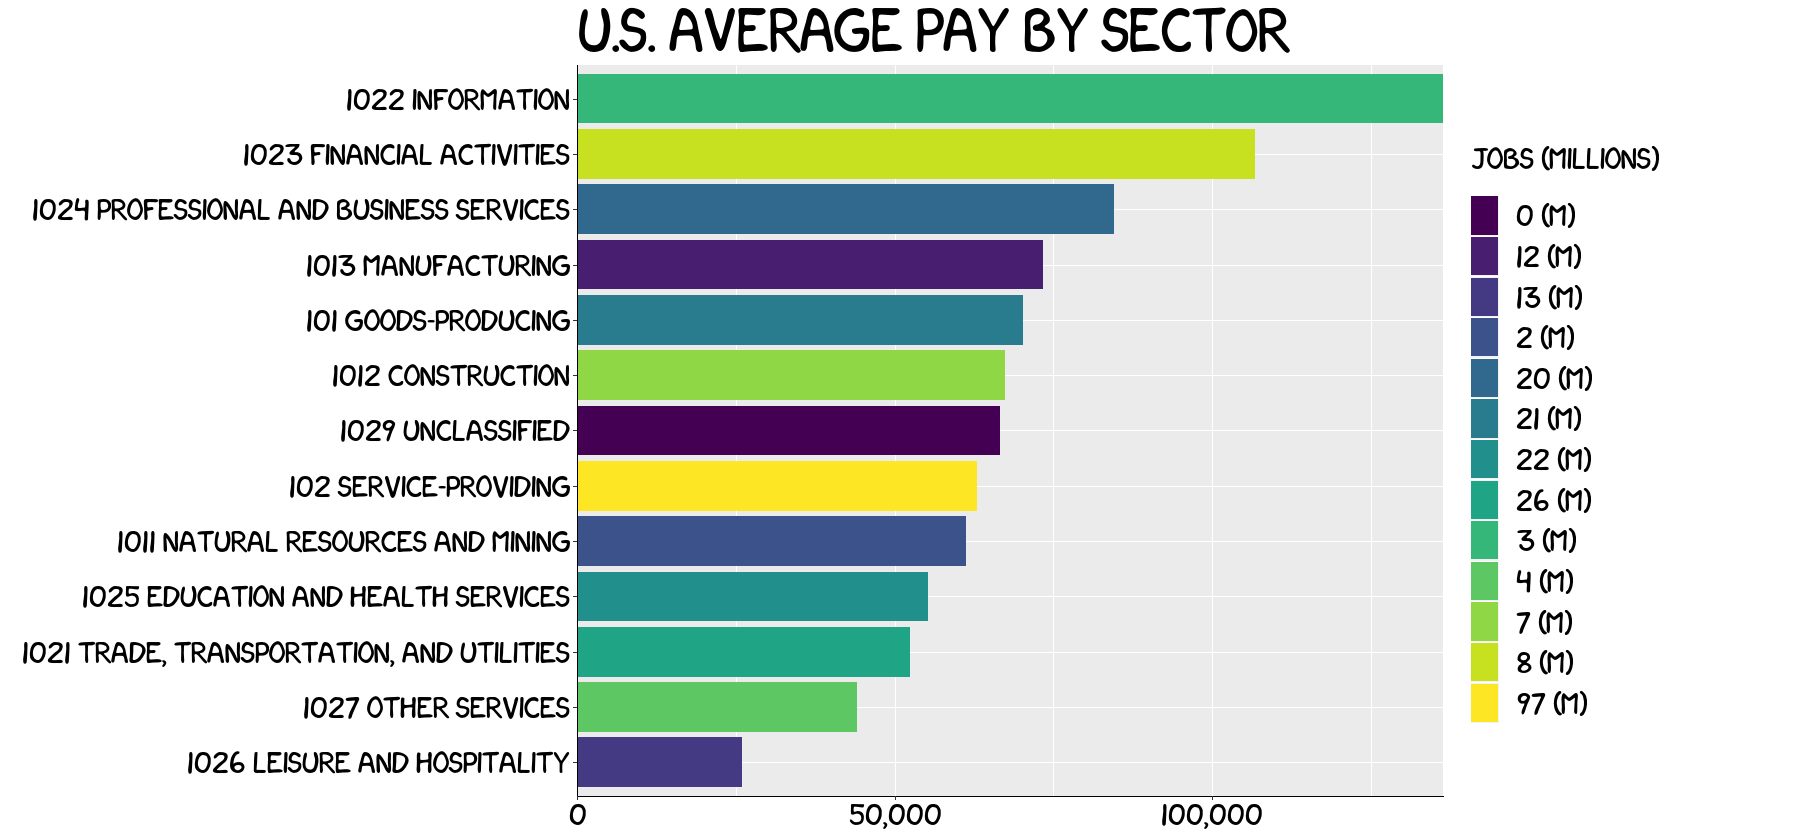

In [23]:
plot_df <- raw_df[raw_df["Ownership"] != "Total Covered" & 
       raw_df["Area.Type"] == "Nation" &
       raw_df["Industry"] != "10 Total, all industries"
       ,]
fontsize <- 20
fill <- c("#c44240","#ca5553", "#d06866", "#d67b79", "#dc8e8c", "#e2a1a0", "#e7b3b3", "#edc6c6", "#f3d9d9", "#f9ecec", "#ffffff")
options(scipen=10000)
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(data=plot_df, aes(x=reorder(Industry, Annual.Average.Pay),y=Annual.Average.Pay, fill=paste(round(Annual.Average.Employment/1000000),"(m)")))+
    geom_bar(stat = "identity")+
    labs(
        x="",
        y="Annual Average Pay",
        title="U.S. Average Pay by Sector",
        color="",
        legend=""
    )+
    scale_y_continuous(NULL, expand = c(0, 0),labels=comma)+
    #scale_colour_continuous(labels=comma)+
    #scale_colour_brewer(palette="Blues")+
    #scale_fill_discrete()+
    #scale_fill_brewer(palette = "Blues")+
    #scale_fill_grey(start = 0, end = 1)+
    #scale_fill_hue(c = 40)+
    #scale_fill_hue(h = c(100, 0))+
    #scale_fill_hue(l=c(0,100))+
    scale_fill_viridis_d()+
    coord_flip()+
    guides(fill = guide_legend(title = "Jobs (millions)"))+
    theme(
        axis.line.x = element_line(size = .5, colour = "black"),
    
        axis.line.y = element_line(size = .5, colour = "black"),
        axis.text.x = element_text(colour = "black", size = fontsize),
        axis.text.y = element_text(colour = "black", size = fontsize),
        legend.title = element_text(colour = "black", size = fontsize),
        legend.text = element_text(colour = "black", size = fontsize),
        plot.title = element_text(family = "XKCD", size=fontsize*2),
        text = element_text(family = "XKCD") )


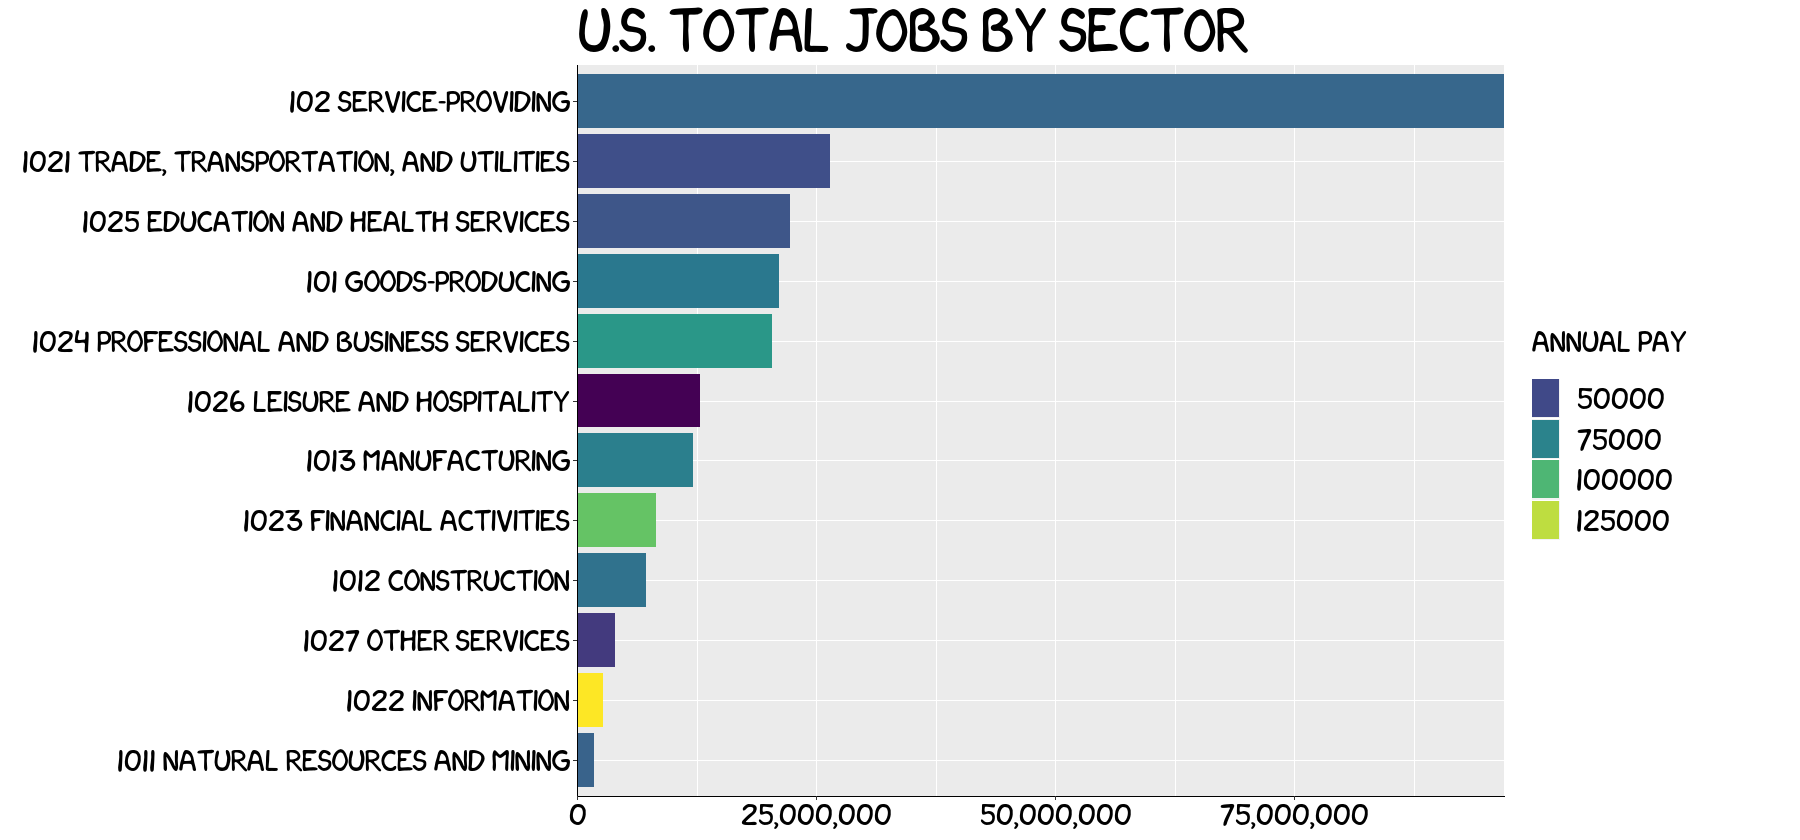

In [24]:
plot_df <- raw_df[raw_df["Ownership"] != "Total Covered" & 
       raw_df["Area.Type"] == "Nation" &
       raw_df["Industry"] != "10 Total, all industries" &
       raw_df["Industry"] != "1029 Unclassified"
       ,]

fill <- c("#c44240","#ca5553", "#d06866", "#d67b79", "#dc8e8c", "#e2a1a0", "#e7b3b3", "#edc6c6", "#f3d9d9", "#f9ecec", "#ffffff")
options(scipen=10000)

ggplot(data=plot_df, aes(x=reorder(Industry, Annual.Average.Employment),y=Annual.Average.Employment, fill=Annual.Average.Pay))+
    geom_bar(stat = "identity")+
    labs(
        x="",
        y="Annual Average Pay",
        title="U.S. Total Jobs by Sector",
        color="",
        legend=""
    )+
    scale_y_continuous(NULL, expand = c(0, 0),labels=comma)+
    #scale_colour_continuous(labels=comma)+
    #scale_colour_brewer(palette="Blues")+
    #scale_fill_discrete()+
    #scale_fill_brewer(palette = "Blues")+
    #scale_fill_grey(start = 0, end = 1)+
    #scale_fill_hue(c = 40)+
    #scale_fill_hue(h = c(100, 0))+
    #scale_fill_hue(l=c(0,100))+
    scale_fill_viridis_c()+
    coord_flip()+
    guides(fill = guide_legend(title = "Annual Pay", labels=comma))+
    theme(
        axis.line.x = element_line(size = .5, colour = "black"),
    
        axis.line.y = element_line(size = .5, colour = "black"),
        axis.text.x = element_text(colour = "black", size = fontsize),
        axis.text.y = element_text(colour = "black", size = fontsize),
        legend.title = element_text(colour = "black", size = fontsize),
        legend.text = element_text(colour = "black", size = fontsize),
        plot.title = element_text(family = "XKCD", size=fontsize*2),
        text = element_text(family = "XKCD") )
    


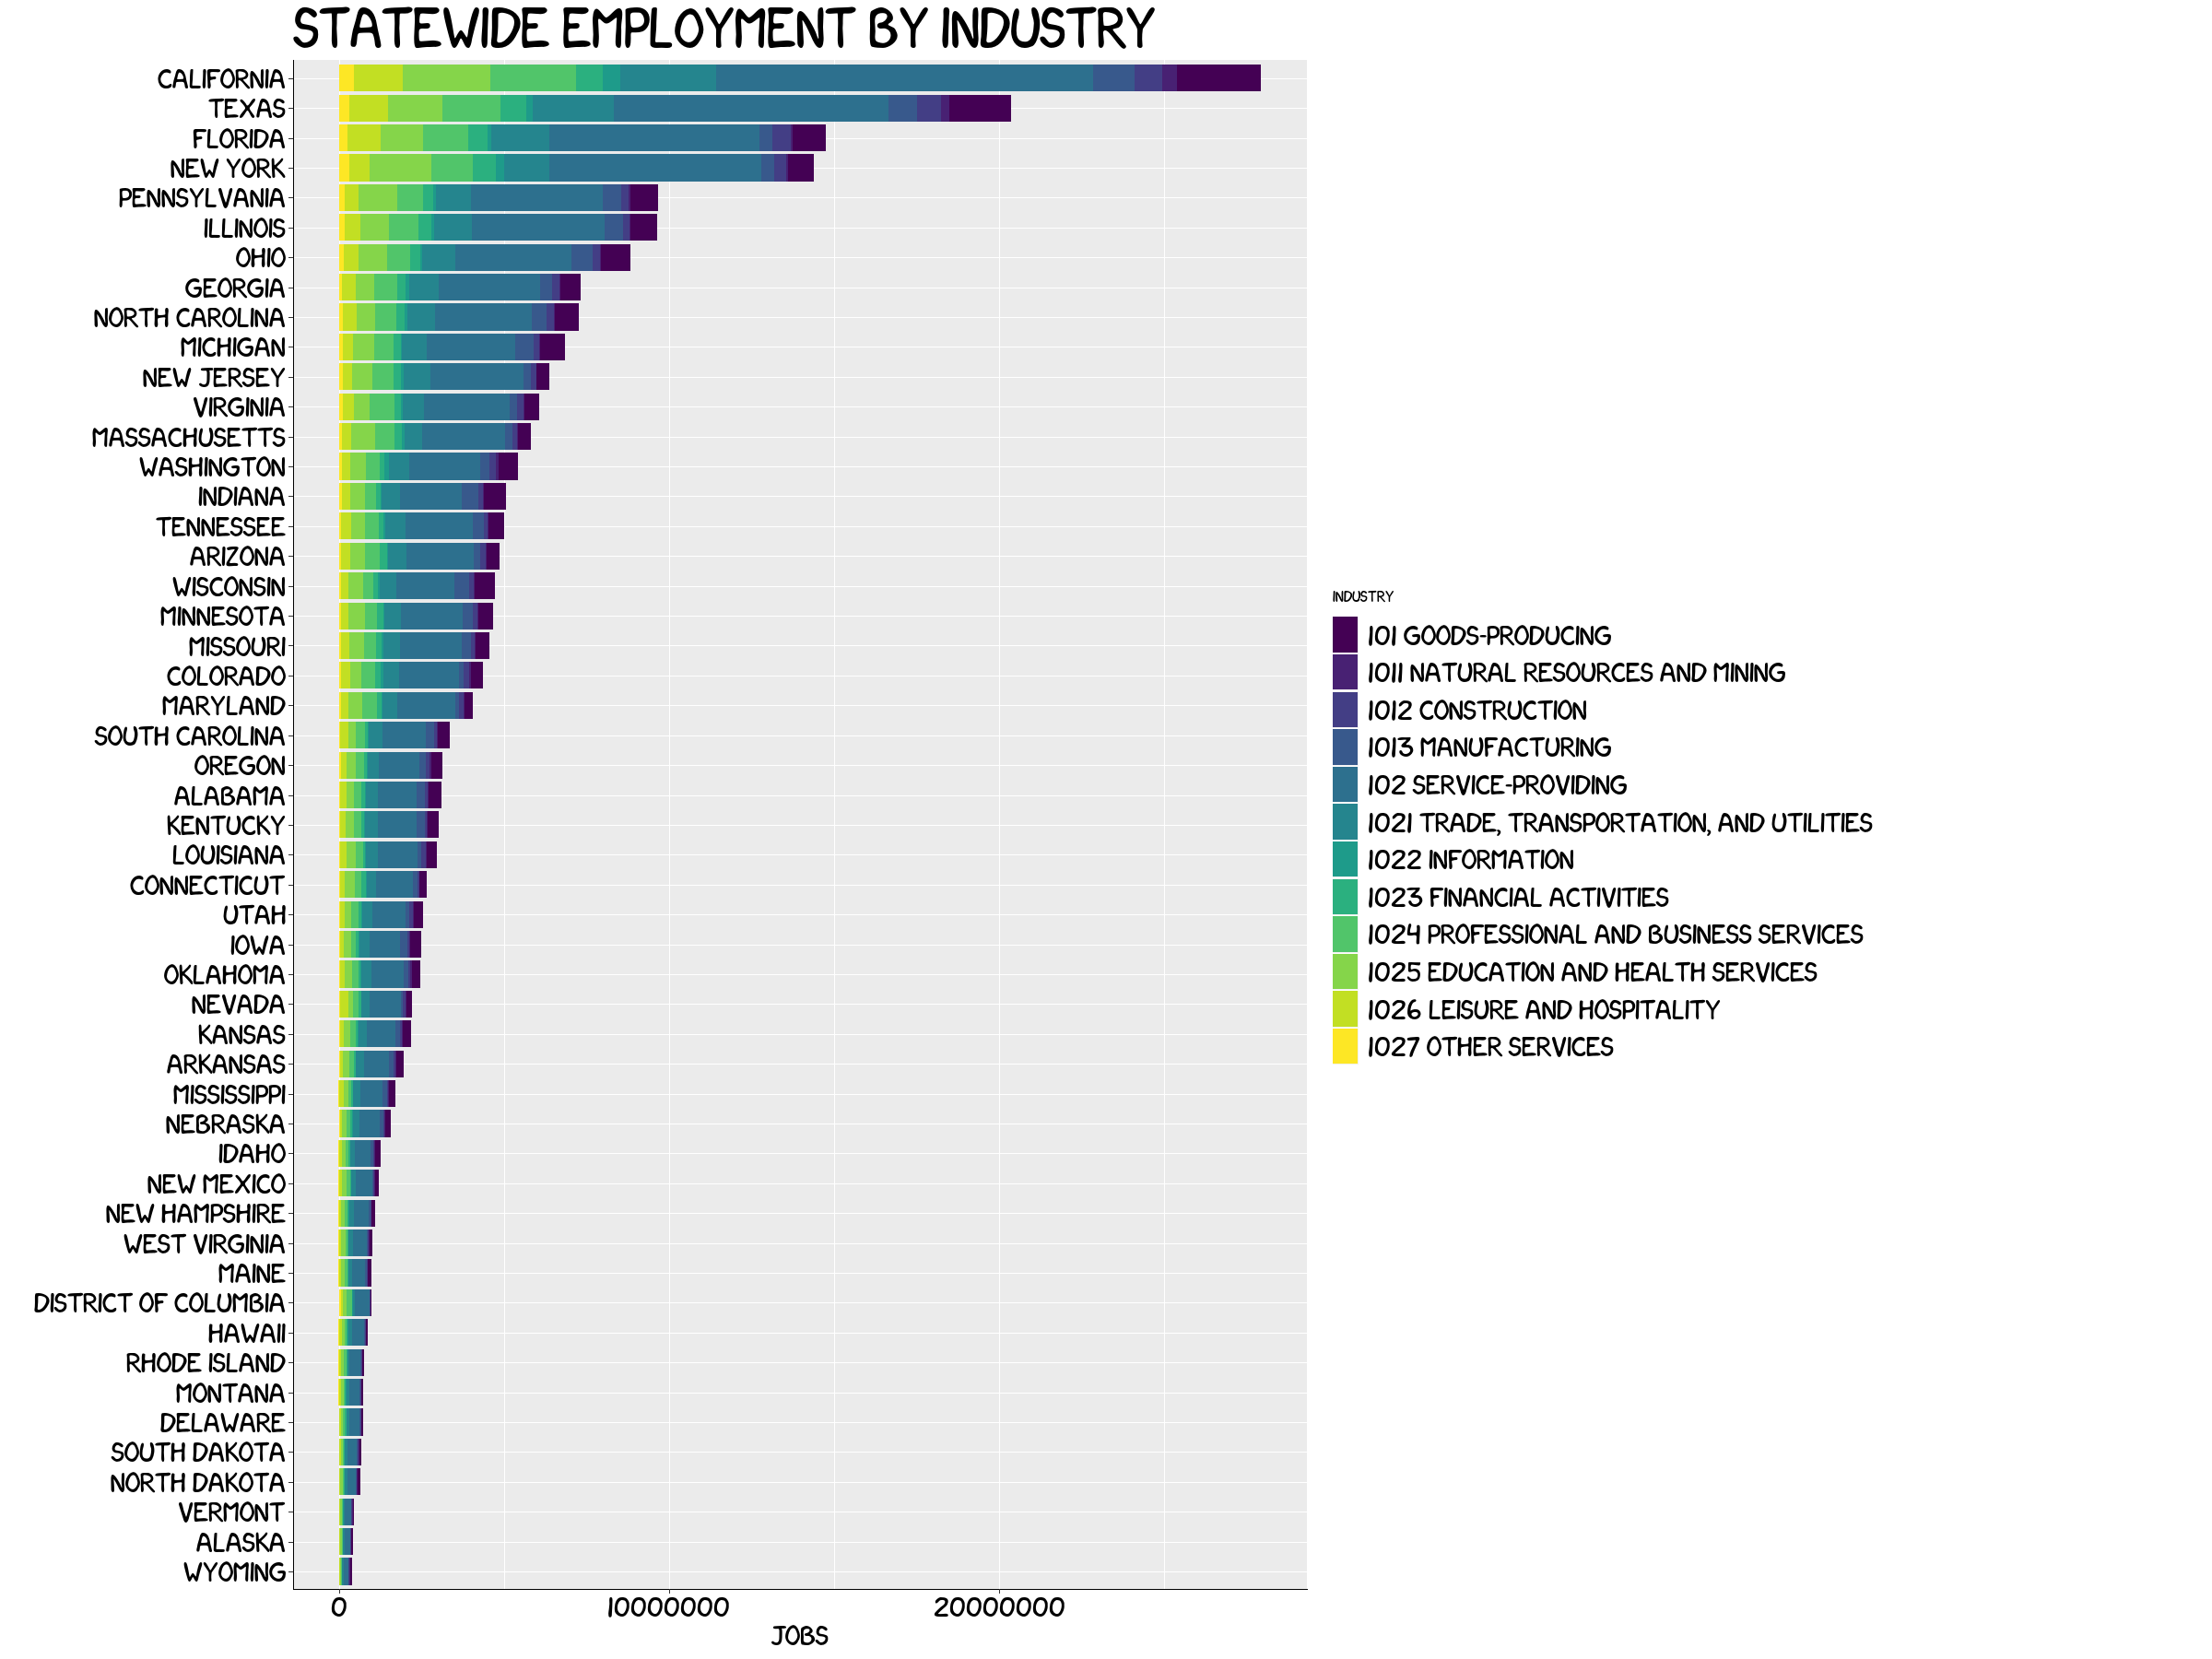

In [25]:
plot_df <- raw_df[raw_df["Ownership"] != "Total Covered" & 
       raw_df["Area.Type"] == "State" &
       raw_df["Industry"] != "10 Total, all industries" &
       raw_df["Industry"] != "1029 Unclassified"
       ,]
options(repr.plot.width = 20, repr.plot.height = 15)
fontsize<-20
ggplot(
    data=plot_df, aes(x=reorder(St.Name,Annual.Average.Employment),y=Annual.Average.Employment, fill=Industry))+
    geom_bar(stat = "identity")+
    labs(
        x="",
        y="Jobs",
        title="Statewide Employment by Industry",
        color="",
        legend=""
    )+
    
    theme(
    axis.title =  element_text(colour = "black", size = fontsize),
    axis.line.x = element_line(size = .5, colour = "black"),

    axis.line.y = element_line(size = .5, colour = "black"),
    axis.text.x = element_text(colour = "black", size = fontsize),
    axis.text.y = element_text(colour = "black", size = fontsize),
    legend.text = element_text(colour = "black", size = fontsize),
    plot.title = element_text(family = "XKCD", size=fontsize*2),
    text = element_text(family = "XKCD") )+
    coord_flip()+
    scale_fill_viridis_d()

In [10]:
plot_df[1:10,]

Area.Code,St,Cnty,Own,NAICS,Year,Qtr,Area.Type,St.Name,Area,Ownership,Industry,Annual.Average.Status.Code,Annual.Average.Establishment.Count,Annual.Average.Employment,Annual.Total.Wages,Annual.Average.Weekly.Wage,Annual.Average.Pay,Employment.Location.Quotient.Relative.to.U.S.,Total.Wage.Location.Quotient.Relative.to.U.S.
01000,01,000,5,101,2020,A,State,Alabama,Alabama -- Statewide,Private,101 Goods-producing,NA,17914,369083,22146312352,1154,60004,1.28,1.34
01000,01,000,5,1011,2020,A,State,Alabama,Alabama -- Statewide,Private,1011 Natural resources and mining,NA,1828,18059,1061587097,1130,58785,0.74,0.87
01000,01,000,5,1012,2020,A,State,Alabama,Alabama -- Statewide,Private,1012 Construction,NA,10316,92801,5490993026,1138,59169,0.94,1.01
01000,01,000,5,1013,2020,A,State,Alabama,Alabama -- Statewide,Private,1013 Manufacturing,NA,5770,258223,15593732229,1161,60389,1.56,1.57
01000,01,000,5,102,2020,A,State,Alabama,Alabama -- Statewide,Private,102 Service-providing,NA,107771,1178924,57396264013,936,48685,0.89,0.84
01000,01,000,5,1021,2020,A,State,Alabama,Alabama -- Statewide,Private,"1021 Trade, transportation, and utilities",NA,32418,372747,17082823860,881,45830,1.03,1.10
01000,01,000,5,1022,2020,A,State,Alabama,Alabama -- Statewide,Private,1022 Information,NA,2560,19298,1337252120,1333,69295,0.52,0.32
01000,01,000,5,1023,2020,A,State,Alabama,Alabama -- Statewide,Private,1023 Financial activities,NA,13856,94765,7188983555,1459,75861,0.84,0.73
01000,01,000,5,1024,2020,A,State,Alabama,Alabama -- Statewide,Private,1024 Professional and business services,NA,22861,242682,15041155719,1192,61979,0.87,0.78
01000,01,000,5,1025,2020,A,State,Alabama,Alabama -- Statewide,Private,1025 Education and health services,NA,15815,228684,11687020752,983,51105,0.75,0.85
